# 데이터
---

## 1. 데이터 불러오기

In [4]:
from tensorflow.keras import datasets
import matplotlib.pyplot as plt
import numpy as np

In [5]:
(x_train, y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()

x_train.shape, y_train.shape, x_test.shape, x_test.shape 

((60000, 28, 28), (60000,), (10000, 28, 28), (10000, 28, 28))


## 2. 데이터 시각화 (EDA)

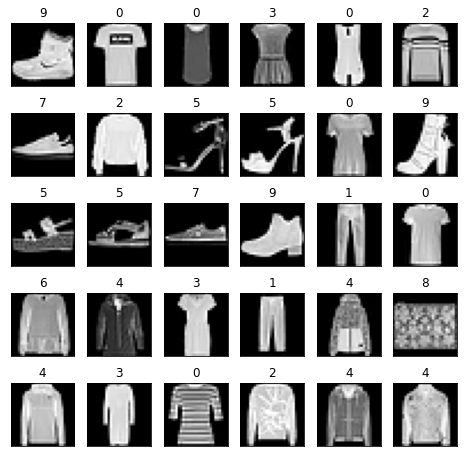

In [6]:
plt.figure(figsize=(8, 8))
for i in range(30):
  plt.subplot(5, 6, i + 1)
  img = x_train[i]
  label = y_train[i]
  plt.imshow(img, cmap= 'gray')
  plt.title(label)
  plt.xticks([])
  plt.yticks([])
plt.show()

* 이미지 확인

In [28]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

* 실제 데이터 확인

* 데이터 시각화

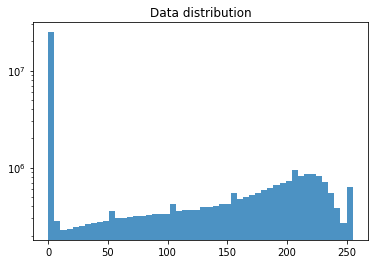

In [8]:
plt.title('Data distribution')
plt.hist(np.reshape(x_train, (60000*28*28)),log=True, bins=50, alpha=0.8)
# plt.hist(np.reshape(x_train, (1, -1)))
plt.show()

## 3. 데이터 전처리
  * 정규화
  * 원핫벡터


### **min max normalization**

# <center>$\frac{x-x_{min}}{x_{max}-x_{min}}$</center>

In [9]:
def minmax(x):
  x_min = np.min(x)
  x_max = np.max(x)
  # print(x_min, x_max)
  result = (x - x_min) / (x_max - x_min)
  return result

In [10]:
x_train_minmax = minmax(x_train)
x_test_minmax = minmax(x_test)

x_train_minmax.shape, x_test_minmax.shape

((60000, 28, 28), (10000, 28, 28))

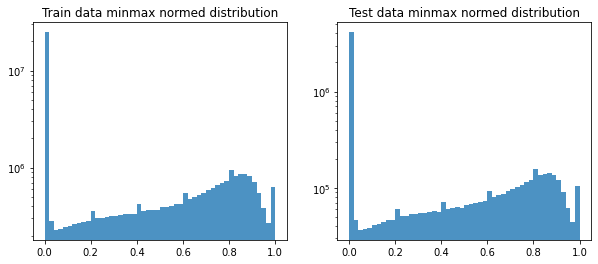

In [11]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.title('Train data minmax normed distribution')
plt.hist(np.reshape(x_train_minmax, (60000*28*28)),log=True, bins=50, alpha=0.8)

plt.subplot(1, 2, 2)
plt.title('Test data minmax normed distribution')
plt.hist(np.reshape(x_test_minmax, (10000*28*28)),log=True, bins=50, alpha=0.8)

plt.show()

### **Z-Score Normalization**


# <center>$\frac{x-\bar{x}}{\sigma}$</center>

In [12]:
def z_score(x):
  x_mean = np.mean(x)
  x_std = np.std(x)
  result = (x - x_mean) / x_std
  return result

In [13]:
x_train_z_score = z_score(x_train)
x_test_z_score = z_score(x_test)

x_train_z_score.shape, x_test_z_score.shape

((60000, 28, 28), (10000, 28, 28))

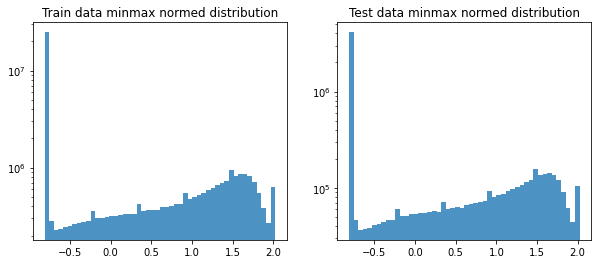

In [14]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.title('Train data minmax normed distribution')
plt.hist(np.reshape(x_train_z_score, (60000*28*28)),log=True, bins=50, alpha=0.8)

plt.subplot(1, 2, 2)
plt.title('Test data minmax normed distribution')
plt.hist(np.reshape(x_test_z_score, (10000*28*28)),log=True, bins=50, alpha=0.8)

plt.show()

### **one-hot coding**

In [15]:
from tensorflow.keras.utils import to_categorical

In [16]:
y_train_onehot = to_categorical(y_train, num_classes =10)
y_test_onehot = to_categorical(y_test, num_classes =10)

y_train_onehot.shape, y_test_onehot.shape

((60000, 10), (10000, 10))

In [17]:
y_train_onehot

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

# 모델
---

In [18]:
from tensorflow.keras import models, layers, optimizers

In [19]:
sr = models.Sequential(name='Softmax_regression')
sr.add(layers.Flatten(input_shape=[28, 28]))
sr.add(layers.Dense(10, activation='softmax'))
sr.summary()

Model: "Softmax_regression"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


## 1. 모델구현
---

### **Softmax regression**

### **DNN**

In [20]:
DNN = models.Sequential(name='DNN')
#Input layer
DNN.add(layers.Flatten(input_shape=[28, 28]))
#hidden layer
DNN.add(layers.Dense(100, activation='relu'))
DNN.add(layers.Dense(100, activation='relu'))
#output layer
DNN.add(layers.Dense(10, activation='softmax'))
DNN.summary()

Model: "DNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


### **CNN**

In [21]:
CNN = models.Sequential(name='CNN')
# x data : (28, 28) -> 2차원
# dense : (764) -> 1차원
# convolution : (28, 28, 1) -> 3차원

#Input layer
CNN.add(layers.Reshape([28, 28, 1], input_shape=[28, 28]))
#hidden layer
CNN.add(layers.Conv2D(10, kernel_size = 5, activation='relu'))
CNN.add(layers.MaxPool2D(pool_size = 3))
CNN.add(layers.Conv2D(10, kernel_size = 5, activation='relu'))
CNN.add(layers.MaxPool2D(pool_size = 3))

#output layer
CNN.add(layers.Flatten())
CNN.add(layers.Dense(10, activation='softmax'))
CNN.summary()

Model: "CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 24, 24, 10)        260       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 10)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 4, 4, 10)          2510      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 1, 10)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 10)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110     

## 2. 학습
---

### **Softmax Regression**

In [22]:
sr.compile(optimizer=optimizers.SGD(learning_rate=0.01),
           loss='categorical_crossentropy',
           metrics=['acc'])
sr.fit(x_train_minmax, y_train_onehot, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 7s 2ms/step - loss: 0.8363 - acc: 0.7333
Epoch 2/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5929 - acc: 0.8083
Epoch 3/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5426 - acc: 0.8217
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5157 - acc: 0.8290
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4979 - acc: 0.8332
Epoch 6/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4851 - acc: 0.8375
Epoch 7/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4759 - acc: 0.8407
Epoch 8/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4680 - acc: 0.8425
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4614 - acc: 0.8445
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4560 - acc: 0.8463
Epoch 11/20
1875/1875 [======

### **DNN**

In [23]:
DNN.compile(optimizer=optimizers.SGD(learning_rate=0.01),
           loss='categorical_crossentropy',
           metrics=['acc'])
DNN.fit(x_train_minmax, y_train_onehot, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7562 - acc: 0.7513
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4967 - acc: 0.8285
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4516 - acc: 0.8424
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4235 - acc: 0.8524
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4036 - acc: 0.8583
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3882 - acc: 0.8637
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3738 - acc: 0.8681
Epoch 8/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3630 - acc: 0.8720
Epoch 9/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3536 - acc: 0.8753
Epoch 10/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3431 - acc: 0.8785
Epoch 11/20
1875/1875 [======

### CNN

In [24]:
CNN.compile(optimizer=optimizers.SGD(learning_rate=0.01),
           loss='categorical_crossentropy',
           metrics=['acc'])
CNN.fit(x_train_minmax, y_train_onehot, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 34s 4ms/step - loss: 1.1147 - acc: 0.6055
Epoch 2/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.6989 - acc: 0.7430
Epoch 3/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.6344 - acc: 0.7631
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5965 - acc: 0.7770
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5700 - acc: 0.7872
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5478 - acc: 0.7989
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5295 - acc: 0.8071
Epoch 8/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5152 - acc: 0.8119
Epoch 9/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5025 - acc: 0.8163
Epoch 10/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4914 - acc: 0.8212
Epoch 11/20
1875/1875 [=====

## 3. 성능평가
---

### Softmax Regression

In [25]:
# evaluate : 성능 평가  test를 하고싶을때 (labels이 있는경우)
# predict : 값 예측을 하고싶을때 (labels이 없는경우)
sr_score = sr.evaluate(x_test_minmax, y_test_onehot, verbose = 1)

print("accuracy :", sr_score[1], "loss :", sr_score[0])

313/313 [==============================] - 1s 3ms/step - loss: 0.4655 - acc: 0.8365
accuracy : 0.8364999890327454 loss : 0.46547895669937134


### DNN

In [26]:
DNN_score = DNN.evaluate(x_test_minmax, y_test_onehot, verbose = 1)

print("accuracy :", DNN_score[1], "loss :", DNN_score[0])

313/313 [==============================] - 1s 3ms/step - loss: 0.3544 - acc: 0.8713
accuracy : 0.8712999820709229 loss : 0.3544173538684845


### CNN

In [27]:
CNN_score = CNN.evaluate(x_test_minmax, y_test_onehot, verbose = 1)

print("accuracy :", CNN_score[1], "loss :", CNN_score[0])

313/313 [==============================] - 1s 3ms/step - loss: 0.4489 - acc: 0.8395
accuracy : 0.8395000100135803 loss : 0.4489458501338959
